In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from pmdarima import auto_arima

In [3]:
data = pd.read_csv('Tesla.csv - Tesla.csv')

In [9]:
# Ensure the date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# What's the change in stock's price over time?

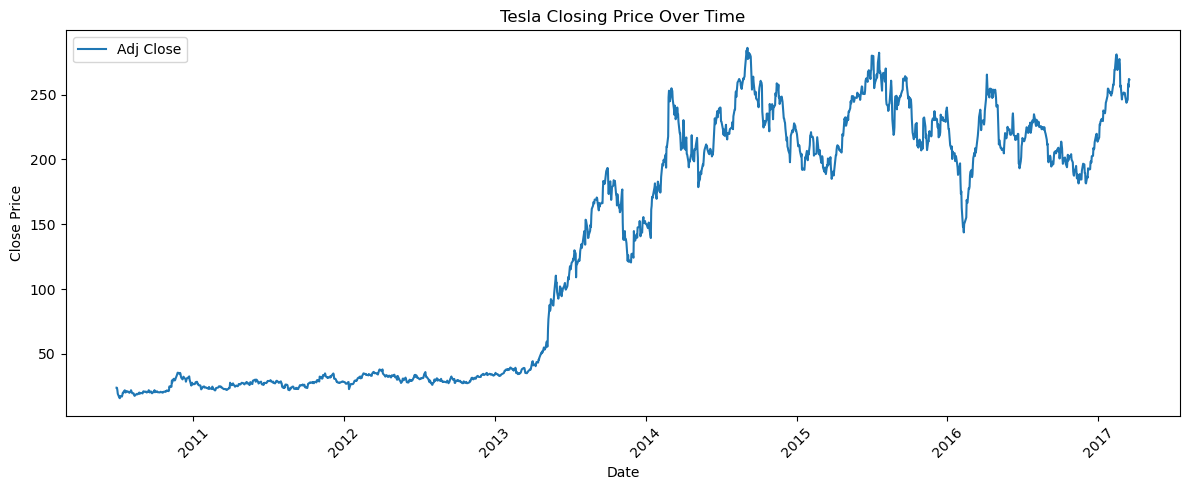

In [5]:
# Plot the Adjusted Closing Price
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Close'], label='Adj Close')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Moving Averages

In [5]:
# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

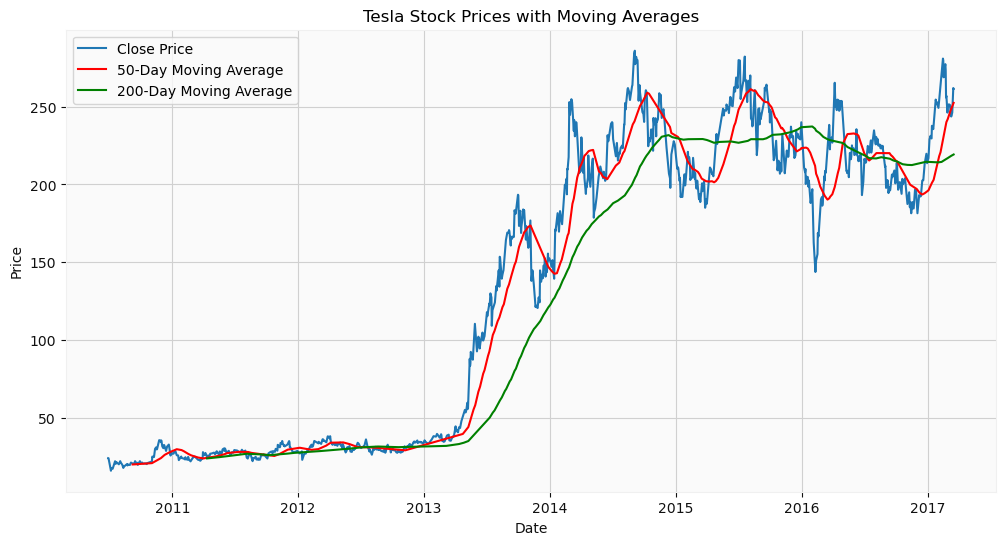

In [25]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='50-Day Moving Average', color='red')
plt.plot(data['MA200'], label='200-Day Moving Average', color='green')
plt.title('Tesla Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Daily Returns

In [7]:
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

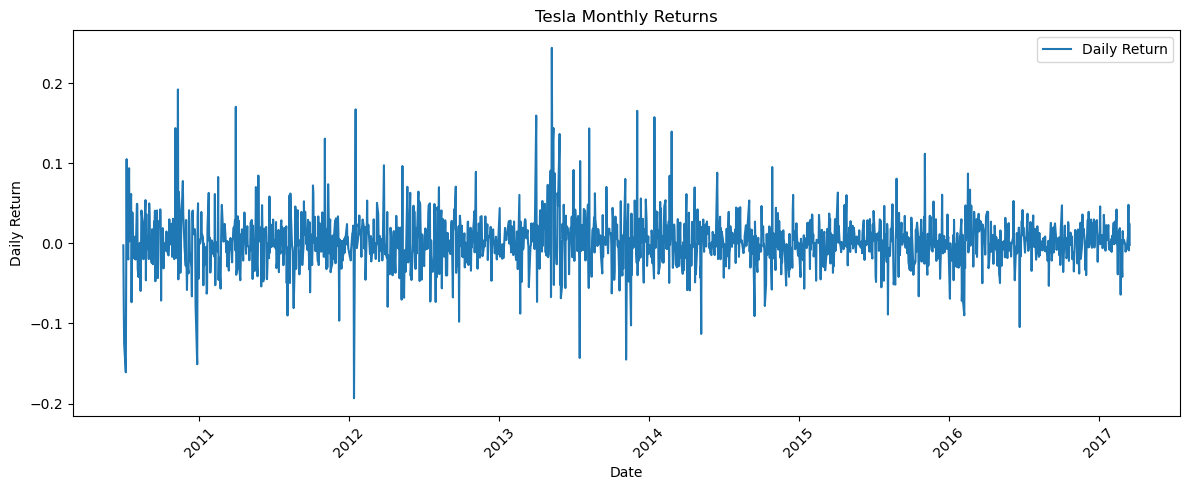

In [12]:
# Plot the daily returns
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Daily Return'], label='Daily Return')
plt.title('Tesla Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Volume Traded

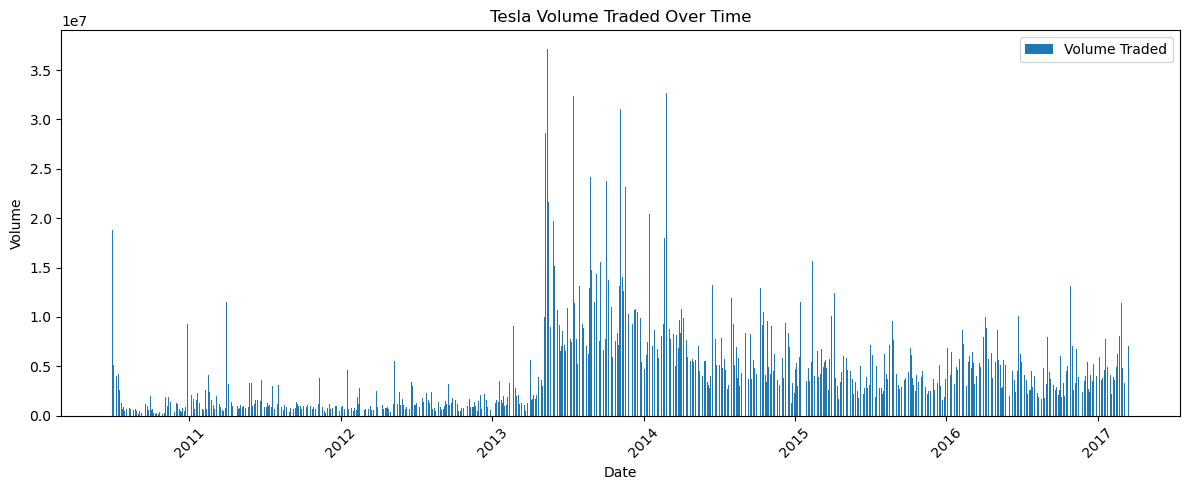

In [13]:
# Plot the volume traded
plt.figure(figsize=(12, 5))
plt.bar(data.index, data['Volume'], label='Volume Traded')
plt.title('Tesla Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Tesla Candlestick Chart with Moving Averages

In [14]:
import mplfinance as mpf

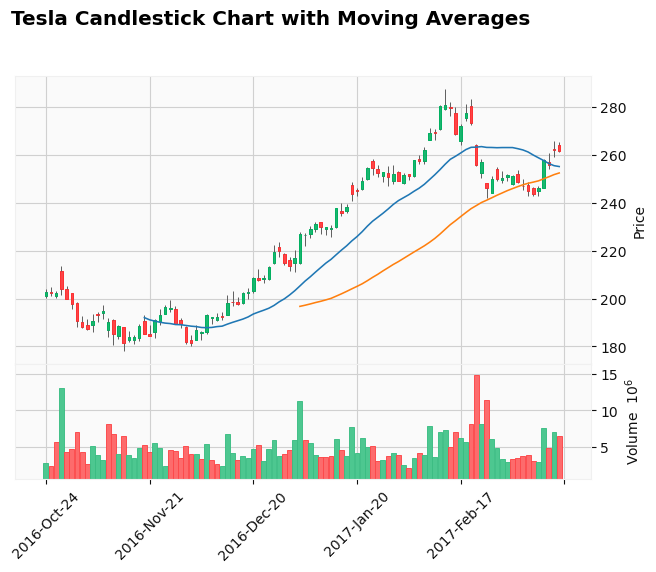

In [15]:
# Resample data to monthly frequency (optional)
monthly_data = .resample('M').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

# Plotting candlestick chart with volume
mpf.plot(data[-100:], type='candle', volume=True, mav=(20,50), style='yahoo', title='Tesla Candlestick Chart with Moving Averages')

# Tesla Cumulative Returns Over Time

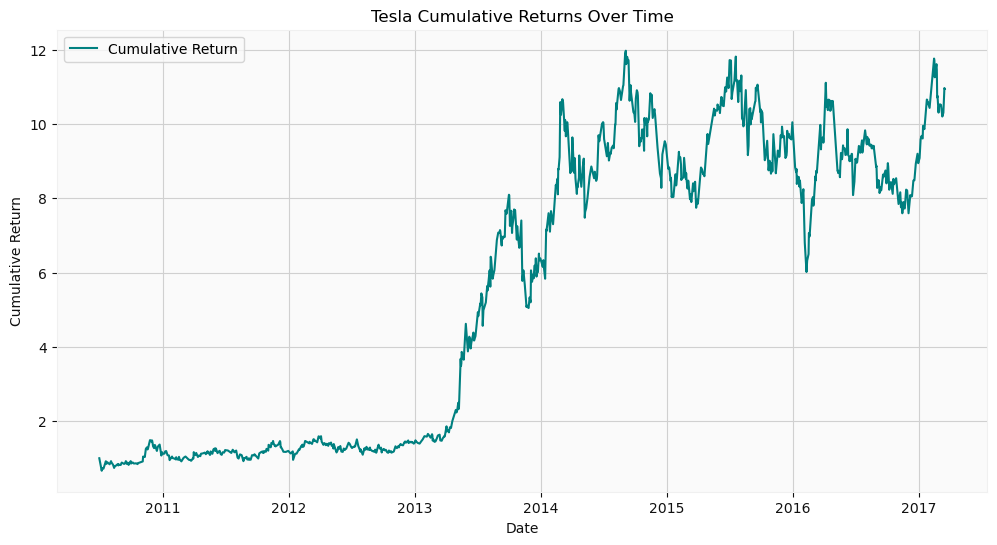

In [16]:
# Calculate cumulative returns
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Return'], label='Cumulative Return', color='teal')
plt.title('Tesla Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Bollinger Bands

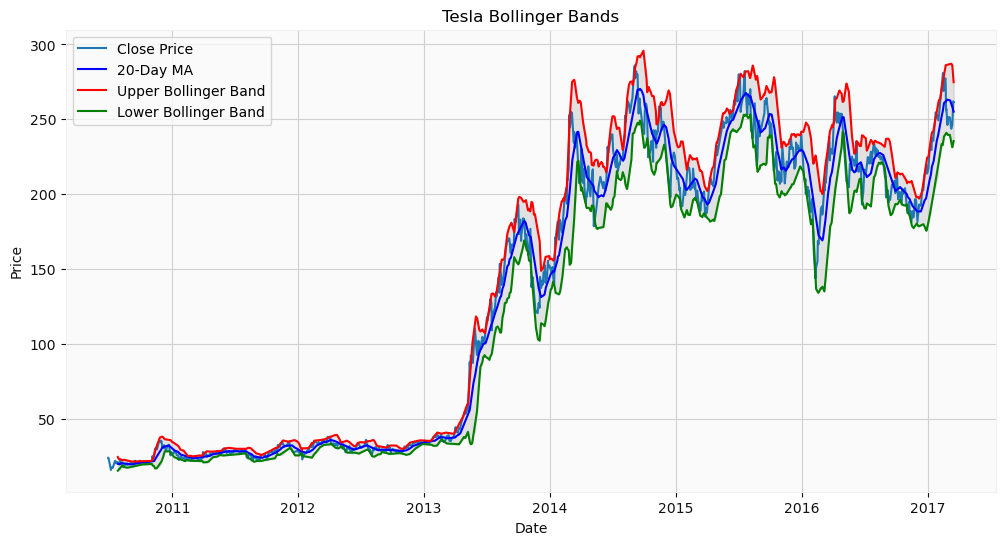

In [20]:
# Calculate Bollinger Bands
data['MA20'] = data['Close'].rolling(window=20).mean()
data['BB_up'] = data['MA20'] + 2*data['Close'].rolling(window=20).std()
data['BB_down'] = data['MA20'] - 2*data['Close'].rolling(window=20).std()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA20'], label='20-Day MA', color='blue')
plt.plot(data['BB_up'], label='Upper Bollinger Band', color='red')
plt.plot(data['BB_down'], label='Lower Bollinger Band', color='green')
plt.fill_between(data.index, data['BB_down'], data['BB_up'], color='gray', alpha=0.2)
plt.title('Tesla Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# MACD (Moving Average Convergence Divergence)

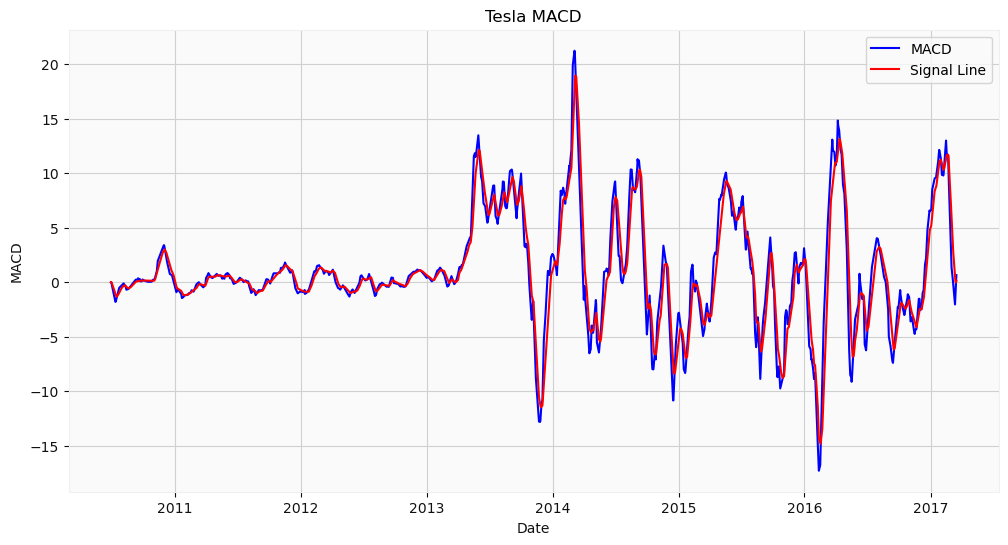

In [22]:
# Calculate MACD
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['Signal'], label='Signal Line', color='red')
plt.title('Tesla MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

# ACF/PACF PLOT

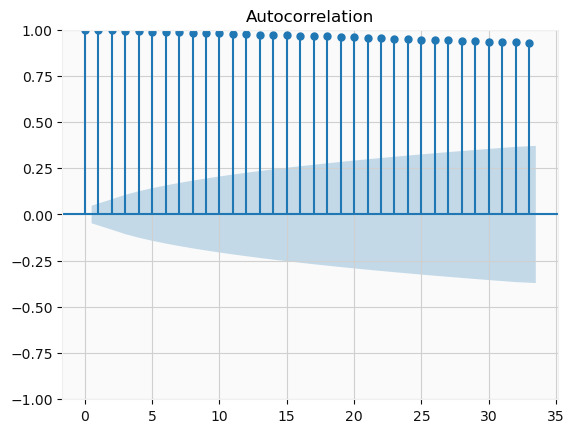

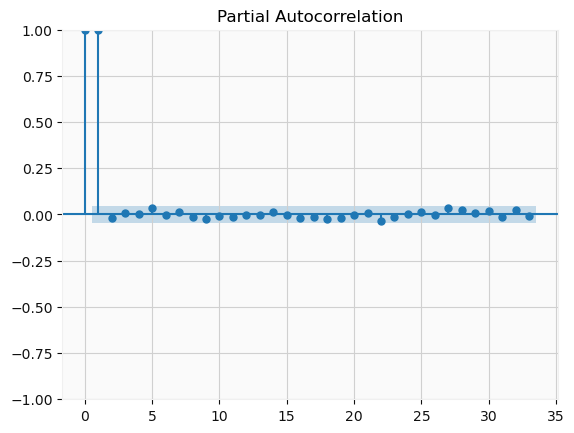

In [24]:
# Plot ACF and PACF
plot_acf(data['Close'].dropna())
plot_pacf(data['Close'].dropna())
plt.show()

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch import arch_model

In [11]:
# Drop missing values
data.dropna(inplace=True)

In [12]:
# Re-run the ADF test on the differenced series
def adf_test(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("Series is non-stationary")
    else:
        print("Series is stationary")

# Run ADF test on differenced series
adf_test(data['Close_diff'])

ADF Statistic: -39.84828024716406
p-value: 0.0
Series is stationary


# GARCH MODEL

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8670.563684883738
Iteration:      2,   Func. Count:     14,   Neg. LLF: 932048.3321783792
Iteration:      3,   Func. Count:     21,   Neg. LLF: 4379.255588110045
Iteration:      4,   Func. Count:     27,   Neg. LLF: 4373.580897525339
Iteration:      5,   Func. Count:     33,   Neg. LLF: 4368.3528941288805
Iteration:      6,   Func. Count:     39,   Neg. LLF: 4424.743195867257
Iteration:      7,   Func. Count:     45,   Neg. LLF: 4297.895922067179
Iteration:      8,   Func. Count:     51,   Neg. LLF: 5052.943663408926
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4239.135493187103
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4232.758645658052
Iteration:     11,   Func. Count:     69,   Neg. LLF: 4225.661419381013
Iteration:     12,   Func. Count:     75,   Neg. LLF: 4216.302682467976
Iteration:     13,   Func. Count:     80,   Neg. LLF: 4216.243566741805
Iteration:     14,   Func. Count:     85,   Neg. LLF: 4216.2368

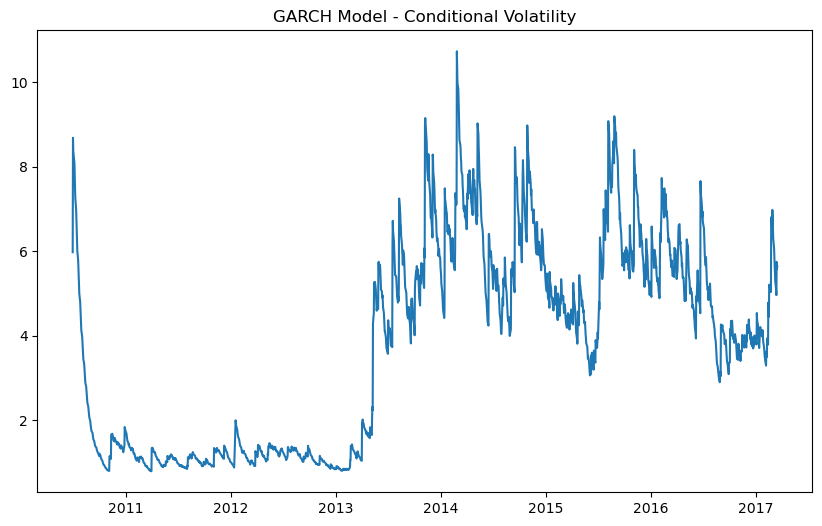

In [14]:
# Fit GARCH model to residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_result = garch_model.fit()
print(garch_result.summary())

# Plot volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_result.conditional_volatility)
plt.title('GARCH Model - Conditional Volatility')
plt.show()

# ARIMA MODEL

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9803.364, Time=4.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9800.883, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9801.307, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9801.305, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9800.616, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9803.305, Time=0.85 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 6.494 seconds
Best ARIMA Parameters:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1691
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4899.308
Date:                Sun, 08 Sep 2024   AIC                           9800.616
Time:                        23:32:18   BIC                           9806.048
Sample:                             0   HQIC                      

C:\Users\vinit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vinit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vinit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vinit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

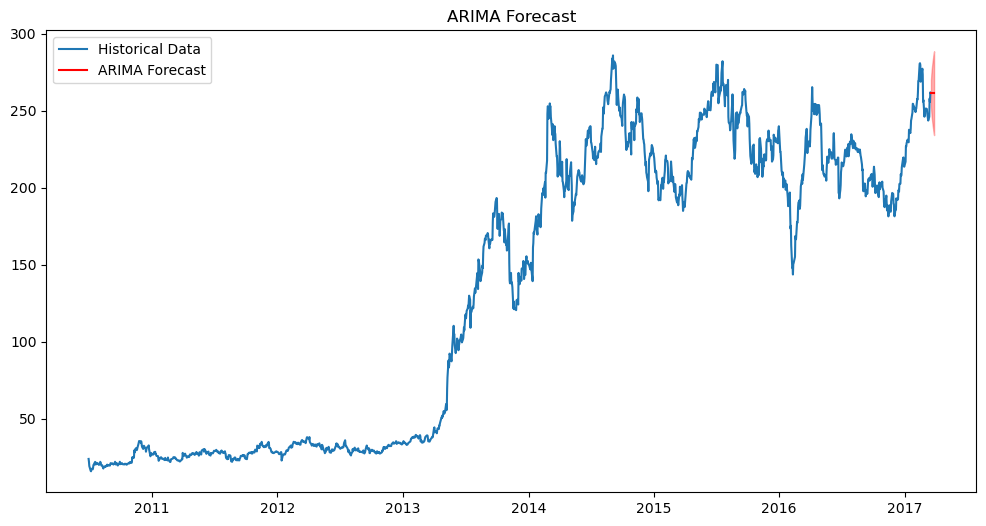

In [22]:
# Auto ARIMA to determine the best parameters
model_auto = auto_arima(data['Close'], seasonal=False, trace=True)
print('Best ARIMA Parameters:', model_auto.summary())

# ARIMA Forecasting
model_arima = ARIMA(data['Close'], order=model_auto.order)  # Use parameters from auto_arima
arima_result = model_arima.fit()

# Forecast future values
forecast_arima = arima_result.get_forecast(steps=forecast_periods)
forecast_arima_mean = forecast_arima.predicted_mean
forecast_arima_conf_int = forecast_arima.conf_int()

# Plot ARIMA Forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_periods + 1, closed='right'),
         forecast_arima_mean, color='red', label='ARIMA Forecast')
plt.fill_between(pd.date_range(start=data.index[-1], periods=forecast_periods + 1, closed='right'),
                 forecast_arima_conf_int.iloc[:, 0], forecast_arima_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

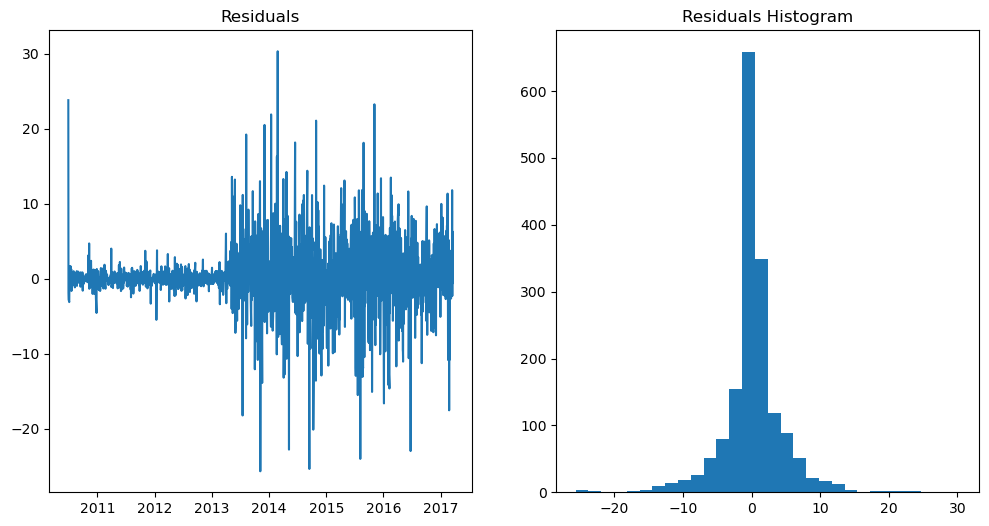

In [23]:
# Residual Analysis
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30)
plt.title('Residuals Histogram')
plt.show()

In [24]:
# Ljung-Box Test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print('Ljung-Box Test Results:\n', lb_test)

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  9.289569   0.504861
